In [2]:
!nvidia-smi

Wed Jun 30 15:04:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.11       Driver Version: 471.11       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |     78MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## What is OpenCV?

OpenCV is

* open source
* computer vision
* built in C++

Available interfaces

* C and C++
* Python ( **<-- today's focus**)
* Java

## OpenCV Basics

* Image representation and data structures
* Arithmetic image operations
* Histograms
* Image thresholding, smoothing, and edge detection
* Motion tracking (optical flow)

In [4]:
!curl https://thlinh.com/wp-content/uploads/2019/03/opencv_python.png -O opencv_python.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17671  100 17671    0     0  17671      0  0:00:01 --:--:--  0:00:01  100k
curl: (6) Could not resolve host: opencv_python.png


## 1 - Image representation and data structures

Images are stored as matrices using NumPy arrays.

In [5]:
img = cv2.imread('opencv_python.png') #default: BGR image instead of RGB

In [6]:
cv2.imshow("img", img)
cv2.waitKey()

-1

In [7]:
print("img.shape = ", img.shape)
print("img.size = ", img.size)
print("img.dtype = ", img.dtype)

img.shape =  (270, 568, 3)
img.size =  460080
img.dtype =  uint8


In [8]:
crop_img = img[:, 0: 260, :]
cv2.imshow("img", crop_img)
cv2.waitKey()

-1

You can split the color channels if you want to work with each individually (cell segmentation, etc).

Alternatively, in true NumPy fashion

In [10]:
b, g, r = cv2.split(img)
cv2.imshow("img split", g)
cv2.waitKey()

-1

In [11]:
merged_img = cv2.merge((b, g, r))
cv2.imshow("img merge", merged_img)
cv2.waitKey()

-1

In [12]:
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]
#working as cv2.split, but use when you don't want to operate on all the channels but only one/two
cv2.imshow("img split", b)
cv2.waitKey()

-1

## 2 - Colors Space

### Gray scale

# $gray = 0.299 \times red + 0.587 \times green + 0.114 \times blue$

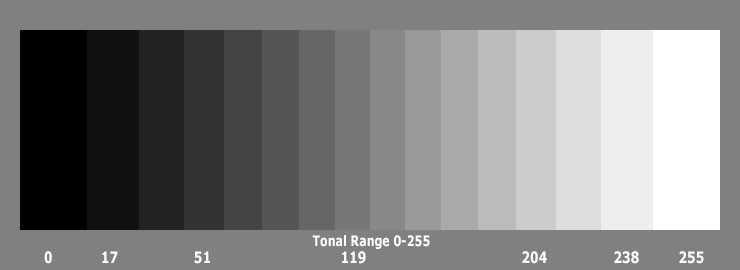

In [15]:
#Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])
#Parameters:
#src: It is the image whose color space is to be changed.
#code: It is the color space conversion code.
#dst: It is the output image of the same size and depth as src image. It is an optional parameter.
#dstCn: It is the number of channels in the destination image. 
#If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.COLOR_BGR2GRAY: change color space from bgr to gray

cv2.imshow("img gray", gray_img)
cv2.waitKey()

-1

### HSV image

**The HSV (Hue, Saturation, Value)** model, also known as HSB (Hue, Saturation, Brightness), defines a color space in terms of three constituent components:
*   Hue, the color type (such as red, blue, or yellow):
    *   Ranges from 0-360 (but normalized to 0-100% in some applications)
*   Saturation, the "vibrancy" of the color:
    *   Ranges from 0-100%
    *   Also sometimes called the "purity" by analogy to the colorimetric quantities excitation purity and colorimetric purity
    *   The lower the saturation of a color, the more "grayness" is present and the more faded the color will appear, thus useful to define desaturation as the qualitative inverse of saturation
*   Value, the brightness of the color:
    *   Ranges from 0-100%

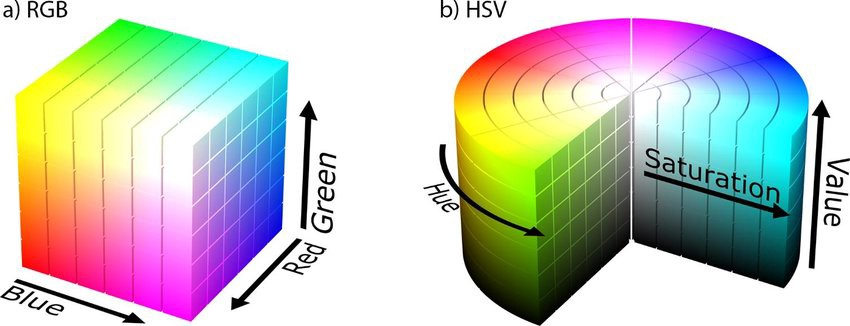

In [19]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
## Notes: The range of hue 0-180° in OpenCV  
cv2.imshow("v image", s)
cv2.waitKey()

-1

In [20]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50]) # H-S-V
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

# Bitwise-AND mask and original image
blue = cv2.bitwise_and(img, img , mask=mask)

In [21]:
cv2.imshow("blue image", blue)
cv2.waitKey()

-1

In [23]:
# define range of blue color in HSV
lower_red = np.array([0, 100, 20])
upper_red = np.array([10, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv_img, lower_red, upper_red)

# Bitwise-AND mask and original image
red = cv2.bitwise_and(img, img , mask= mask)

In [24]:
cv2.imshow("red image", red)
cv2.waitKey()

-1

In [25]:
# define range of blue color in HSV
lower = np.array([50, 52, 72]) 
upper = np.array([102, 255, 255])

mask = cv2.inRange(hsv_img, lower, upper)

green = cv2.bitwise_and(img, img , mask=mask)

In [26]:
cv2.imshow("green image", green)
cv2.waitKey()

-1

### * Another color space and formula: [click here](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)

### 3 - Convolution and Filtering

> Documents: [Image Filtering](https://docs.opencv.org/4.5.2/d4/d13/tutorial_py_filtering.html)

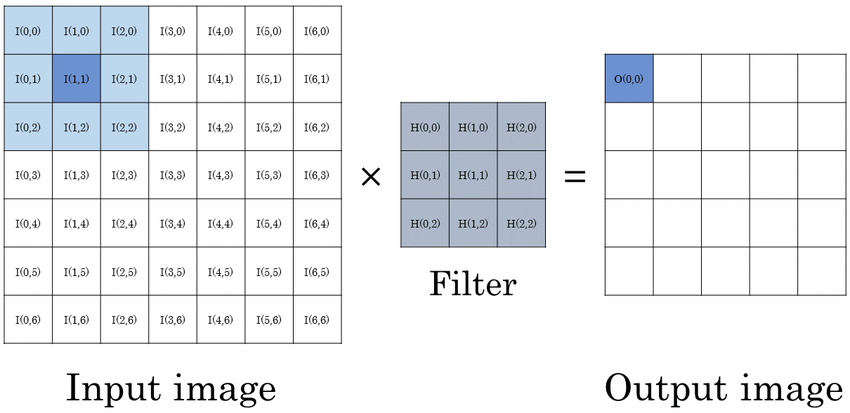

### 2D Convolution

In [27]:
kernel = np.ones((5,5),np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

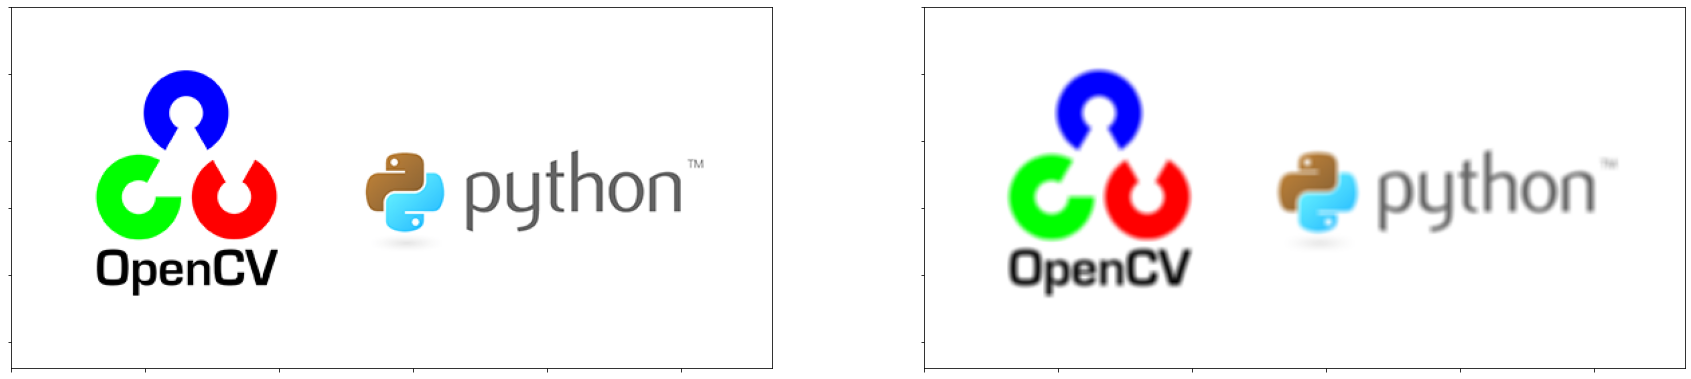

In [56]:
conv_img = cv2.filter2D(img,-1,kernel) # -1 la padding

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 30))

ax1.imshow(img)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2.imshow(conv_img)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

### Gaussian Blur

*   In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function.
*   It is a widely used effect in graphics software, typically to reduce image noise and reduce detail.

In [60]:
gaussian_blur = cv2.GaussianBlur(img,(5, 5), 1)
gaussian_blur2 = cv2.GaussianBlur(img,(5, 5), 10)
cv2.imshow("img",img)
cv2.waitKey()

cv2.imshow("img",gaussian_blur)
cv2.waitKey()

cv2.imshow("img",gaussian_blur2)
cv2.waitKey()


32

### 4 - Histogram Equalisation

> [Histogram Documents](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)

In [ ]:
!wget --no-check-certificate \
    https://miro.medium.com/max/700/1*0JwGb7OY6U3EvV_FFDiQkw.jpeg \
    -O flower.jpg

--2021-06-24 08:54:44--  https://miro.medium.com/max/700/1*0JwGb7OY6U3EvV_FFDiQkw.jpeg
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25959 (25K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>]  25.35K  --.-KB/s    in 0.001s  

2021-06-24 08:54:44 (36.0 MB/s) - ‘flower.jpg’ saved [25959/25959]



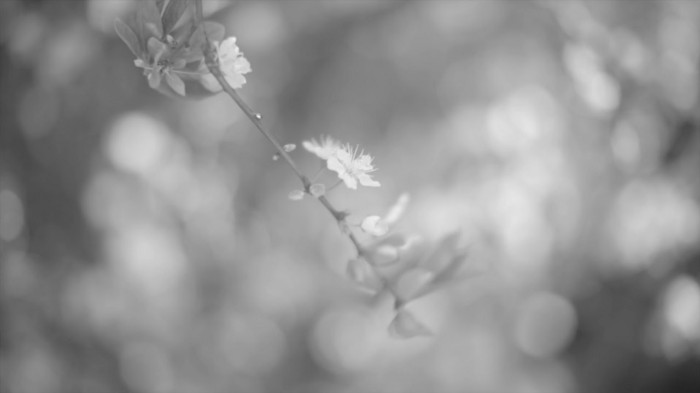

In [ ]:
flower = cv2.imread("flower.jpg", 0)
cv2_imshow(flower)

#### **Documents**
* [np.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
* [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

*   It is a method that improves the contrast in an image, in order to stretch out the intensity range



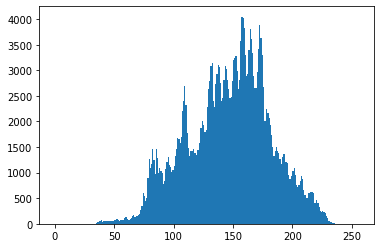

In [ ]:
plt.hist(flower.ravel(),256,[0,256]);  # so luongj gia tri

plt.show()

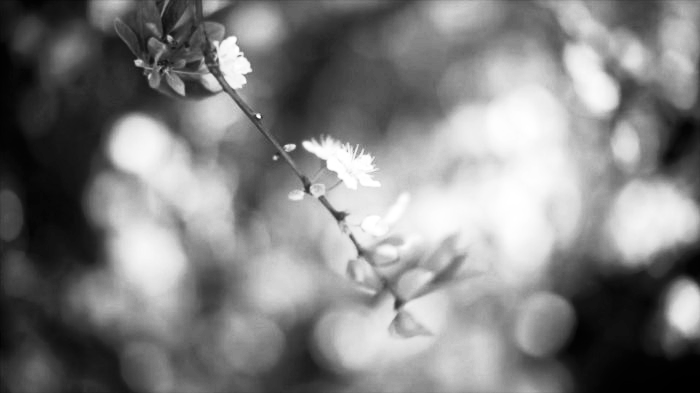

In [ ]:
img_hist = cv2.equalizeHist(flower)
cv2_imshow(img_hist)

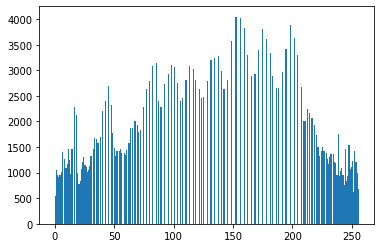

In [ ]:
plt.hist(img_hist.ravel(),256,[0,256]); 
plt.show()

### 5 - Canny Edge Detection

> [Canny edge detection documents](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

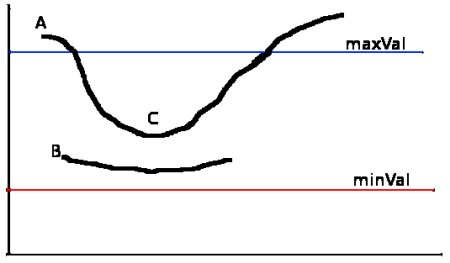

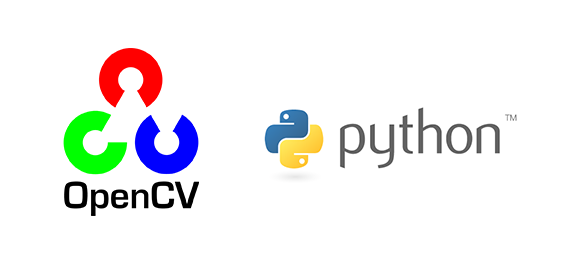

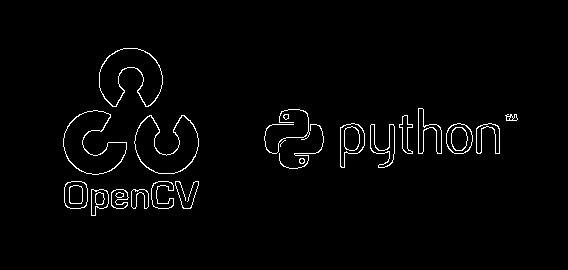

In [ ]:
edges = cv2.Canny(img,100,200)
cv2_imshow(img)
cv2_imshow(edges)

### 6 - Erosion and Dilation

> [Erosion and Dalation documents](https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html)

> [Morphological documents](https://docs.opencv.org/4.5.2/d9/d61/tutorial_py_morphological_ops.html)

văn bản in đậm#### Dilation

In [ ]:
kernel = np.ones((3, 3), dtype=np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


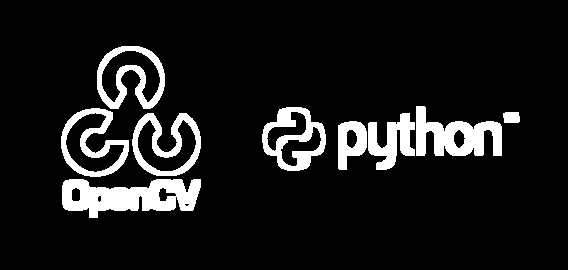

In [ ]:
dilation = cv2.dilate(edges, kernel, iterations=2)
cv2_imshow(dilation)

#### Erosion

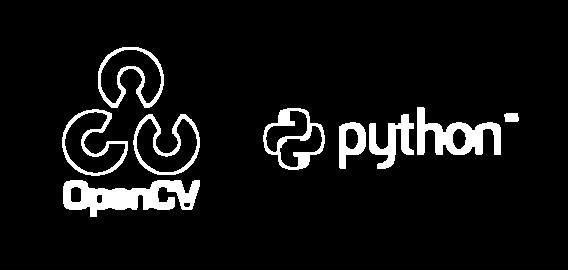

In [ ]:
erosion = cv2.erode(dilation, kernel, iterations=1)
cv2_imshow(erosion)

In [ ]:
!wget --no-check-certificate \
    https://i.stack.imgur.com/t1r9P.jpg \
    -O hand.jpg

--2021-06-24 09:10:56--  https://i.stack.imgur.com/t1r9P.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.52.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60101 (59K) [image/jpeg]
Saving to: ‘hand.jpg’

hand.jpg            100%[===================>]  58.69K  --.-KB/s    in 0.008s  

2021-06-24 09:10:56 (7.62 MB/s) - ‘hand.jpg’ saved [60101/60101]



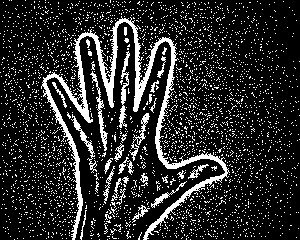

In [ ]:
hand_image = cv2.imread('hand.jpg')
cv2_imshow(hand_image)

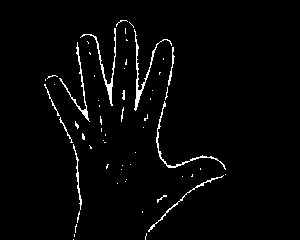

In [ ]:
kernel = np.ones((3,3), dtype=np.uint8)
erosion = cv2.erode(hand_image, kernel, iterations=1)
cv2_imshow(erosion)

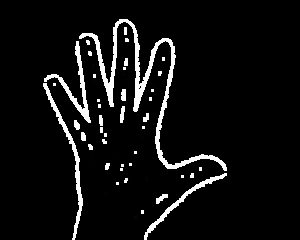

In [ ]:
dilation = cv2.dilate(erosion, kernel, iterations=1)
cv2_imshow(dilation)

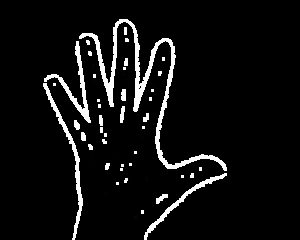

In [ ]:
morph_open = cv2.morphologyEx(hand_image, cv2.MORPH_OPEN, kernel)
cv2_imshow(morph_open)

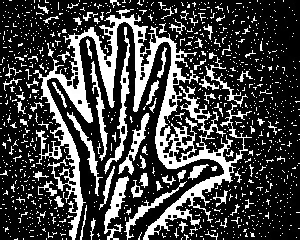

In [ ]:
morph_close = cv2.morphologyEx(hand_image, cv2.MORPH_CLOSE, kernel)
cv2_imshow(morph_close)

### 7 - Contours

> [Contours features documents](https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html)

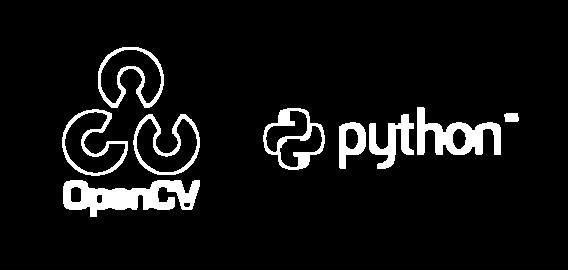

In [ ]:
cv2_imshow(erosion)

In [ ]:
copy_image = np.copy(img)
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


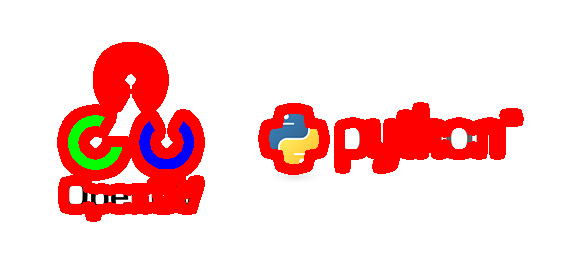

In [ ]:
cv2.drawContours(copy_image, contours, -1, (0, 0, 255), 5)
cv2_imshow(copy_image)

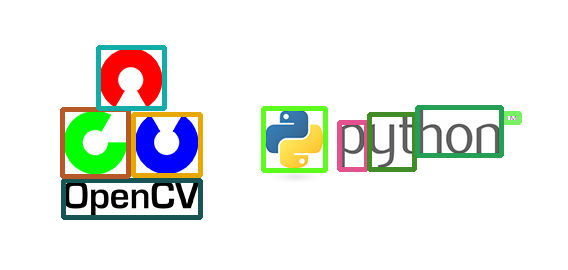

In [ ]:
np.random.seed(3010)
copy_image = np.copy(img)
for cnt in contours: #contour 1 list
    x, y, w, h = cv2.boundingRect(cnt)  # 
    x2, y2 = x + w, y + h
    random_color = (np.random.randint(255), np.random.randint(255), np.random.randint(255))
    cv2.rectangle(copy_image, (x, y), (x2, y2), random_color, 3)
cv2_imshow(copy_image)

### 8 - Video in OpenCV (Only local)

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
vid = cv2.VideoCapture(0)
while True:
    ret, frame = vid.read()
    
    if ret:
        cv2.imshow("frame", frame)
    else:
        break
    
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()

#### 8 - Exercises

**Bài tập 1:**
- Sử dụng OpenCV để vẽ lá cờ của 3 nước bất kỳ.
- Lưu ý: có thể lựa chọn lá cờ tùy ý. Tuy nhiên lá cờ càng khó thì sẽ được đánh giá cao hơn.

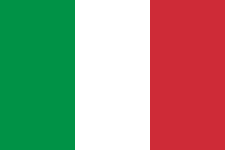


AttributeError: ignored

**Bài tập 2:** Virtual Painter
*   Sử dụng các phương pháp detect màu để vẽ lên video lấy từ webcam.
*   Yêu cầu tối thiểu với 3 màu Red, Green, Blue.
*   Sẽ đánh giá tốt hơn nếu có thể làm nhiều màu khác nhau.
*   Input sẽ là video lấy từ webcam.
*   (Nâng cao) Sử dụng 2 chấm cùng màu, thực hiện chức năng tăng giảm âm lượng của máy dựa trên khoảng cách của 2 chấm đó.

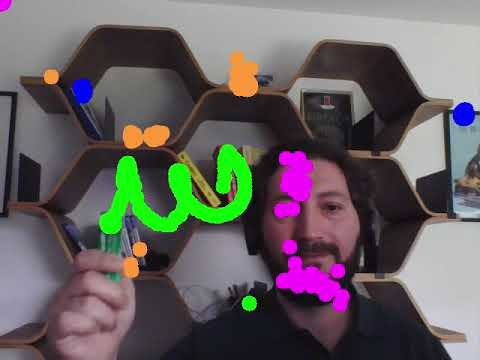

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('7E4KCOdQ37Q')

**Bài tập 3: Text Detect and Edge Detect.**
*   Link dữ liệu [tại đây](https://drive.google.com/drive/folders/1YJSnP1KRJAz5zJEd1Uafjt5dXWKJDdAt?usp=sharing).
*   Nhận diện các đoạn text trong hình và vẽ bouding box cho các đoạn text đó.
*   Nhận diện được các ô trả lời lớn các trường hợp bình thường. Vẽ các contours lên hình.
*   (Nâng cao) Xử lí được các trường hợp có nét mực nối giữa 2 ô trả lời lớn liên tiếp.
*   Giả sử đã biết tọa độ (x, y) của các dấu tic, toe. Hãy define ra 10 dấu tic, toe (tự chọn hoặc ngẫu nhiên), sau đó loại bỏ đi các ô trả lời lớn không chứa dấu tic toe nào cả.



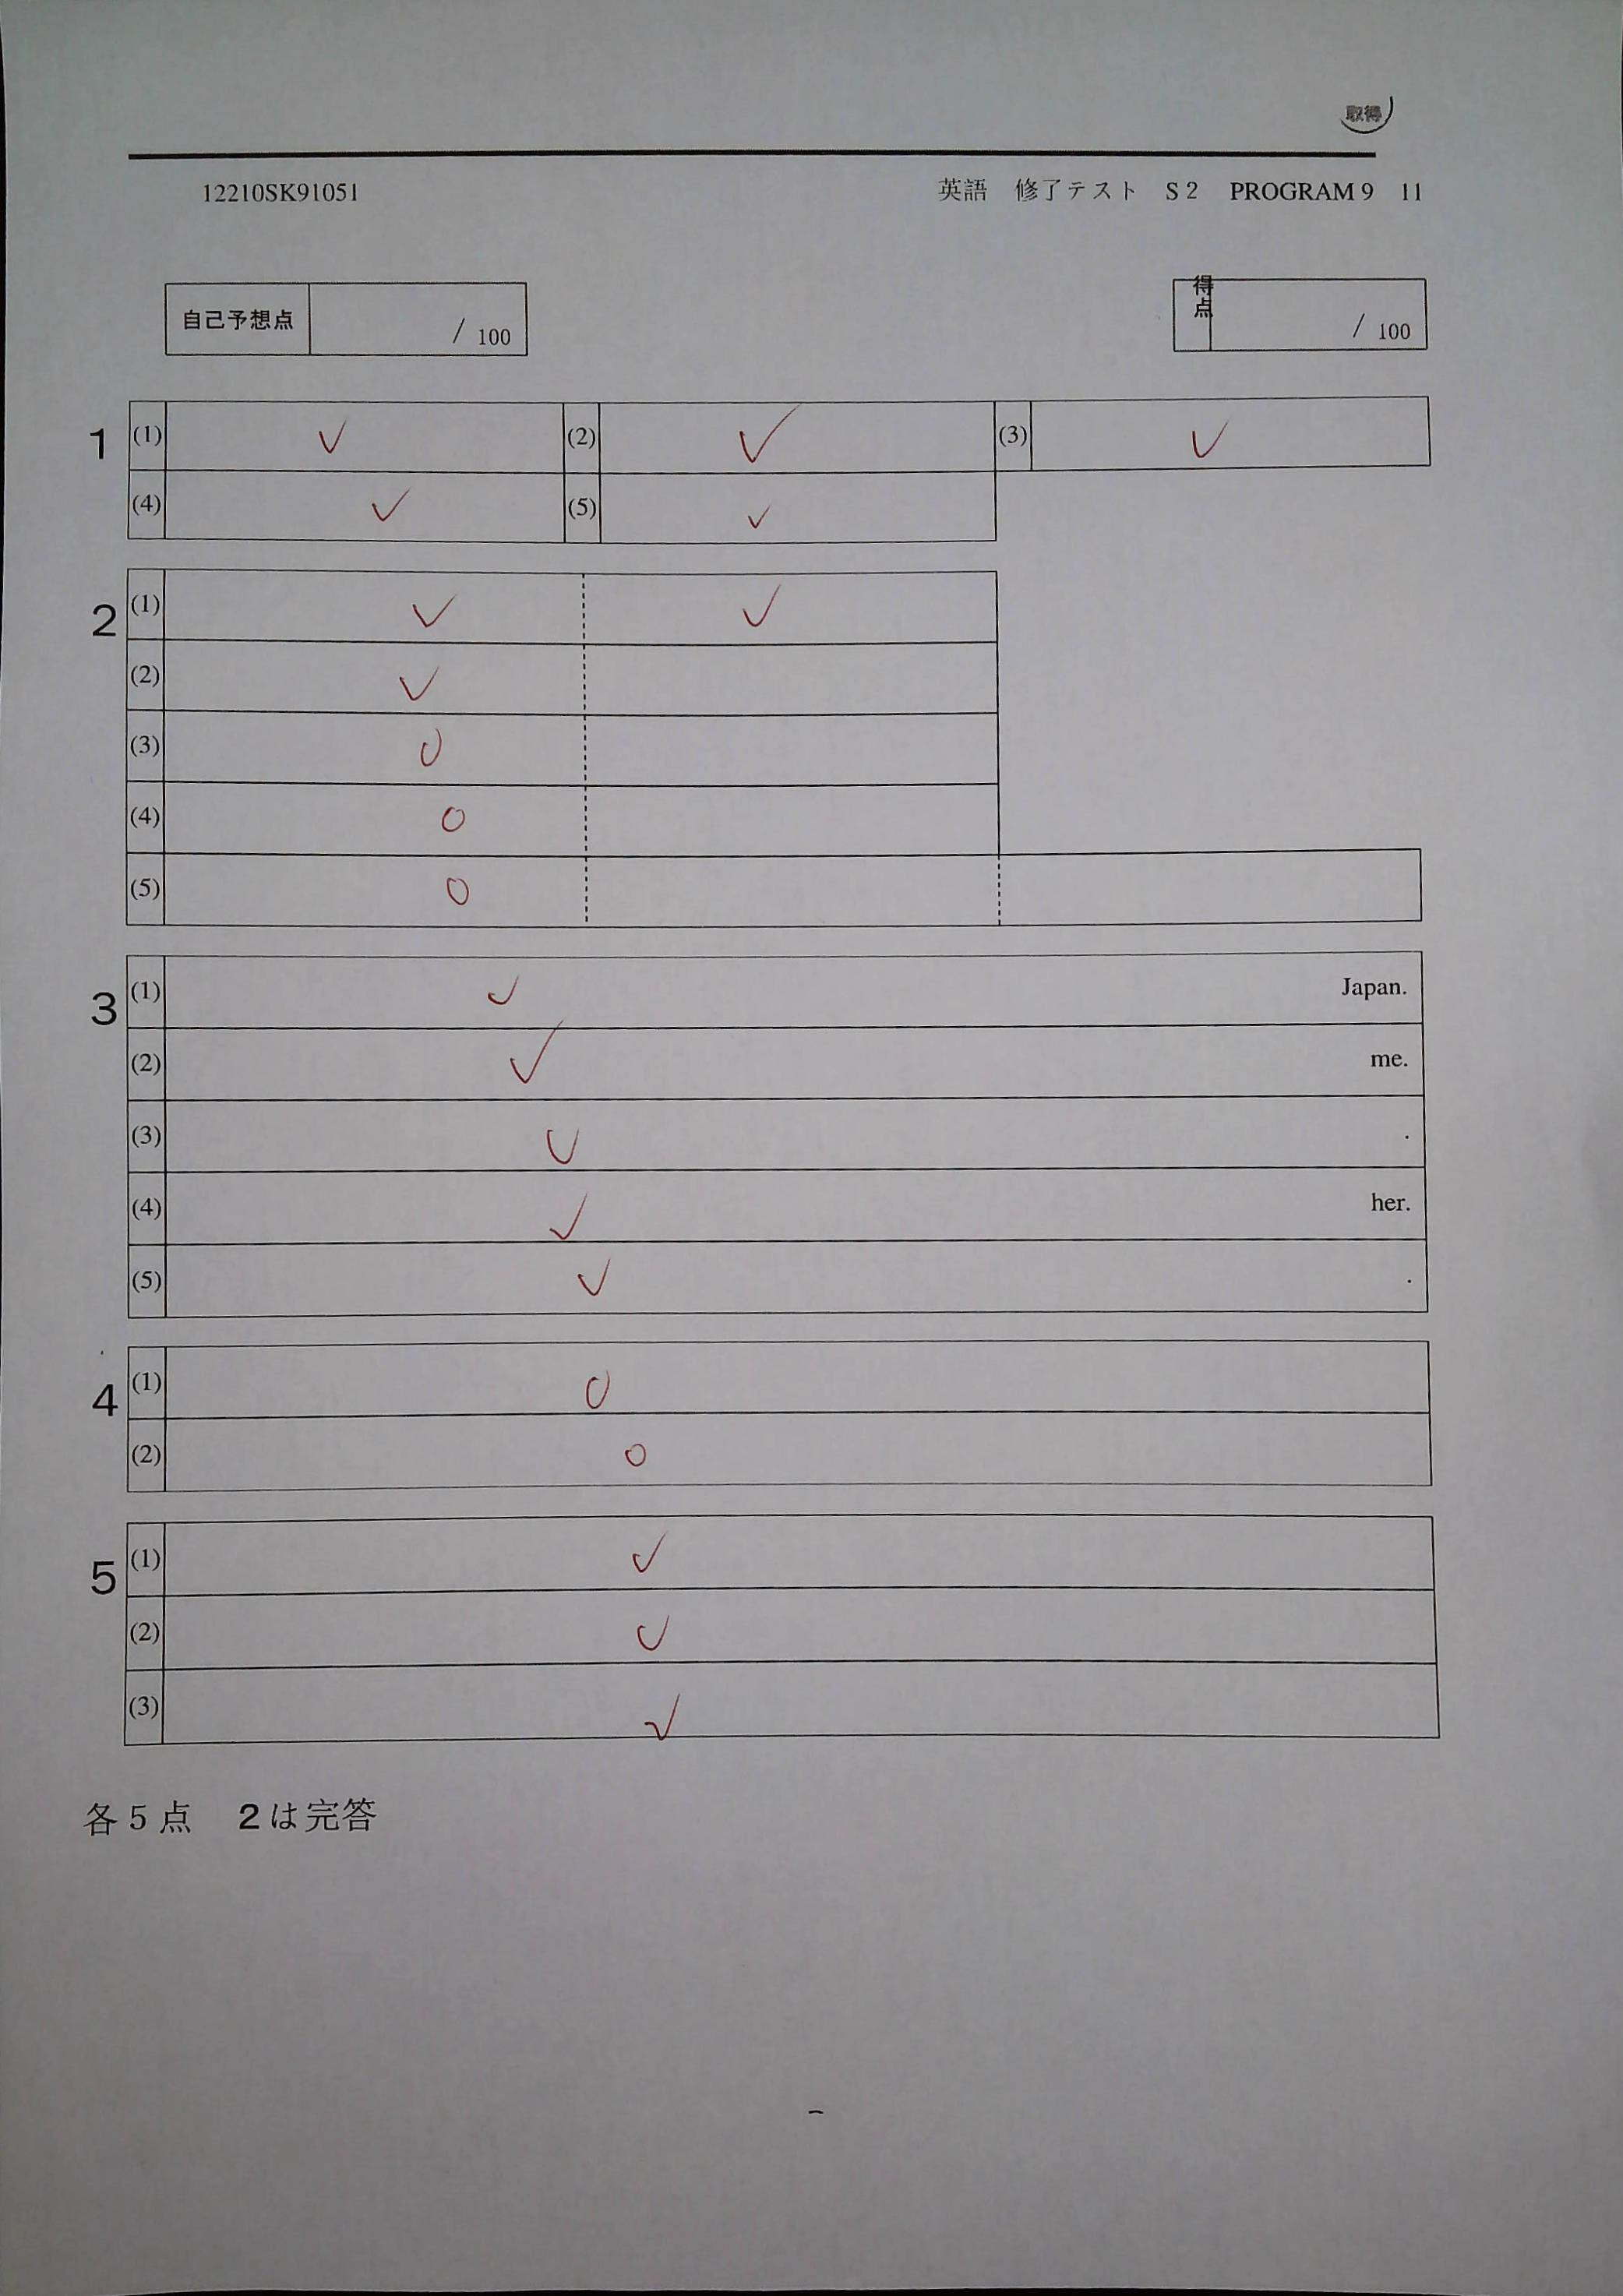